# Team Miss Meteo

## Idéas/ A faire

hello

## Résumé

- Traitement Données
- Visualisation
- ACP
- K-Means

## Variables
- insee 	Informe sur la localisation de la station :
- Numéro 	Station
    - 06088001 	Nice
    - 31069001 	Toulouse Blagnac
    - 33281001 	Bordeaux-Mérignac
    - 35281001 	Rennes
    - 59343001 	Lille Lesquin
    - 67124001 	Strasbourg Entzheim
    - 75114001 	Paris-Montsouris
- tH2_obs 	Observation de la température à 2 mètres in situ- au point station (prédictant)
- ech 	Echéance de validité
- capeinsSOL0 	Energie potentielle convective
- ciwcH20 	Fraction de glace nuageuse à 20 mètres
- clwcH20 	Fraction d'eau nuageuse à 20 mètres
- nH20 	Fraction nuageuse à 20 mètres
- pMER0 	Pression au niveau de la mer
- rr1SOL0 	Précipitation horaire au niveau du sol
- rrH20 	Précipitation horaire à 20 mètres
- tpwHPA850 	Température potentielle au niveau 850 hPa
- ux1H10 	Rafale 1 minute du vent à 10 mètres composante zonale
- vapcSOL0 	Colonne de vapeur d'eau
- vx1H10 	Rafale 1 minute du vent à 10 mètres composante verticale
- ddH10_rose4 	Direction du vent à 10 mètres en rose4
- ffH10 	Force du vent à 10 mètres en m/s
- flir1SOL0 	Flux Infra-rouge en J/m2
- fllat1SOL0 	Flux de chaleur latente en J/m2
- flsen1SOL0 	Flux de chaleur sensible en J/m2
- flvis1SOL0 	Flux visible en J/m2
- hcoulimSOL0 	Hauteur de la couche limite en mètres
- huH2 	Humidité 2mètres en %
- iwcSOL0 	Réservoir neige kg/m2 (équivalent en eau liquide des chutes de neige)
- nbSOL0_HMoy 	Nébulosité basse (moyenne sur les 6 points de grille autour de la station) (fraction en octat du ciel occulté)
- ntSOL0_HMoy 	Nébulosité totale (moyenne sur les 6 points de grille autour de la station)
- tH2 	Température à 2 mètres du modèle AROME
- tH2_VGrad_2.100 	Gradient vertical de température entre 2 mètres et 100 mètres
- tH2_XGrad 	Gradient zonal de température à 2 mètres
- tH2_YGrad 	Gradient méridien de température à 2 mètres
- mois 	Le mois

## Data analysis

In [2]:
path="./../data_meteo/"
meteo=read.table(paste(path,"train_1.csv",sep=""),sep=";",header=T,dec=",")
# Vérification du contenu
cat("Nombre de lignes :",nrow(meteo));
cat("\nNombre de colonnes :",ncol(meteo))
summary(meteo)

Nombre de lignes : 6167
Nombre de colonnes : 31

         date          insee             tH2_obs       capeinsSOL0      
 2014-01-01:   7   Min.   : 6088001   Min.   :-6.10   Min.   :   0.000  
 2014-01-02:   7   1st Qu.:31069001   1st Qu.: 6.70   1st Qu.:   0.000  
 2014-01-03:   7   Median :35281001   Median :10.50   Median :   1.029  
 2014-01-04:   7   Mean   :43900001   Mean   :10.71   Mean   :  37.366  
 2014-01-05:   7   3rd Qu.:67124001   3rd Qu.:14.50   3rd Qu.:  20.049  
 2014-01-06:   7   Max.   :75114001   Max.   :29.80   Max.   :1083.809  
 (Other)   :6125                                      NA's   :581       
    ciwcH20           clwcH20        ddH10_rose4     ffH10         
 Min.   :0.0e+00   Min.   :0.00000      : 126    Min.   : 0.00823  
 1st Qu.:0.0e+00   1st Qu.:0.00000   1.0:1274    1st Qu.: 1.73647  
 Median :0.0e+00   Median :0.00000   2.0: 831    Median : 2.59133  
 Mean   :0.0e+00   Mean   :0.00001   3.0:1892    Mean   : 3.02133  
 3rd Qu.:0.0e+00   3rd Qu.:0.00000   4.0:2044    3rd Qu.: 3.80775  
 Max.   

In [3]:
class(meteo$flvis1SOL0)

[1] "numeric"

**Changement du type de la variable `date`**

On veut changer le type de la variable `date` pour lui donner le type `date` de R et pouvoir les comparer facilement.

In [4]:
cat("Classe de la variable date :",class(meteo$date),"\n")
meteo[,1]<-as.Date(as.character(meteo[,1]), "%Y-%m-%d")
cat("Classe de la variable date après changement:",class(meteo$date),"\n")

Classe de la variable date : factor 
Classe de la variable date après changement: Date 


****Normalisation des variables****

In [5]:
# quanti to factor
meteo$insee<-as.factor(meteo$insee)
meteo$mois<-as.factor(meteo$mois)
meteo$ddH10_rose4<-as.factor(meteo$ddH10_rose4)
meteo$ech<-as.factor(meteo$ech)

****Transformation de la modalité supplémentaire du vent en NA****

In [6]:
levels(meteo$ddH10_rose4)[1]
meteo$ddH10_rose4[is.na(match(meteo$ddH10_rose4,levels(meteo$ddH10_rose4)[2:5]))]<-NA

[1] ""

In [7]:
summary(meteo$ddH10_rose4)

1.0  2.0  3.0  4.0 NA's 
   0 1274  831 1892 2044  126

In [8]:
meteo$ddH10_rose4<-factor(meteo$ddH10_rose4)
summary(meteo$ddH10_rose4)

1.0  2.0  3.0  4.0 NA's 
1274  831 1892 2044  126

In [9]:
summary(meteo$date)

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2014-01-01" "2014-08-09" "2015-03-17" "2015-03-17" "2015-10-23" "2016-05-30"

On sépare nos données pour l'analyse bidimensionnelle des variables qualitatives et quantitatives. Cette phrase est compliquée.  

Il y a 5 variables qualitatives et 26 variables quantitatives.

In [10]:
list_num<-sapply(meteo,FUN=is.numeric)
meteo_quanti<-meteo[,list_num]
meteo_quali<-meteo[,!list_num]

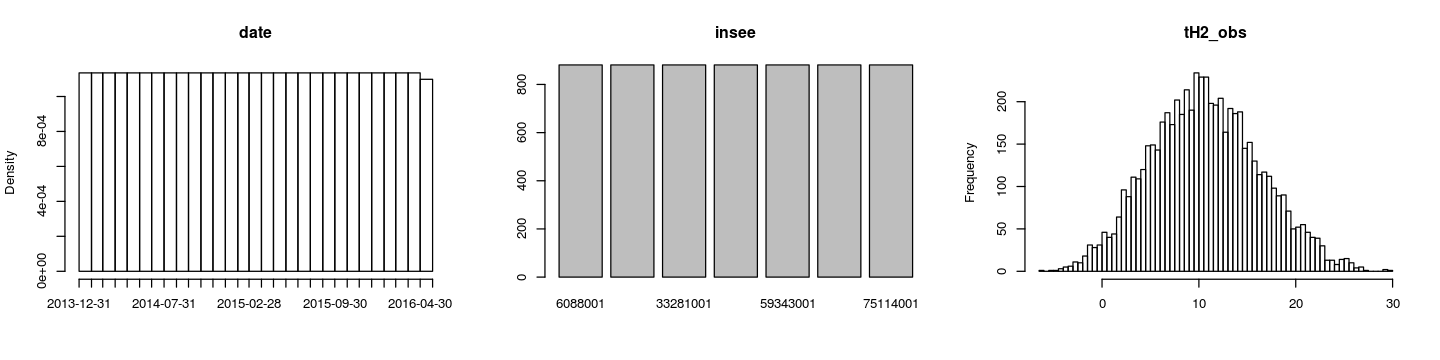

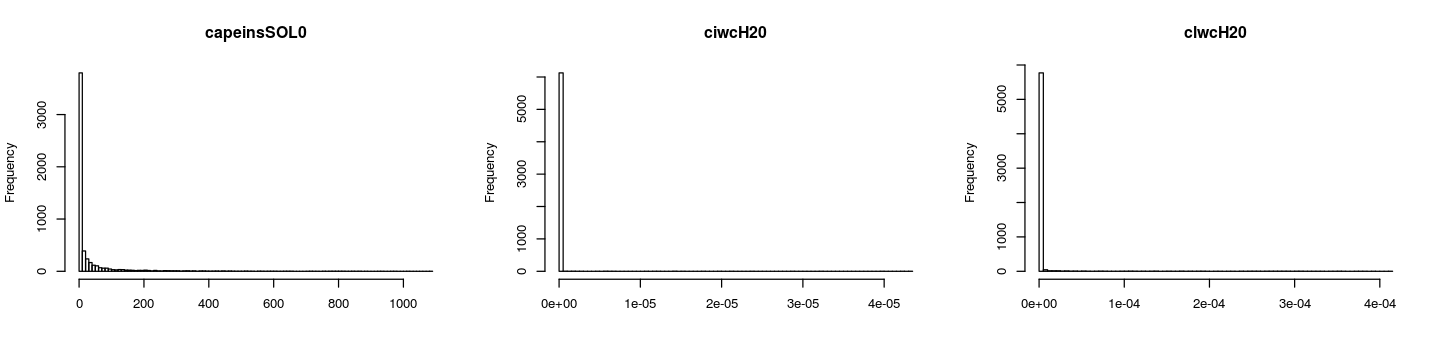

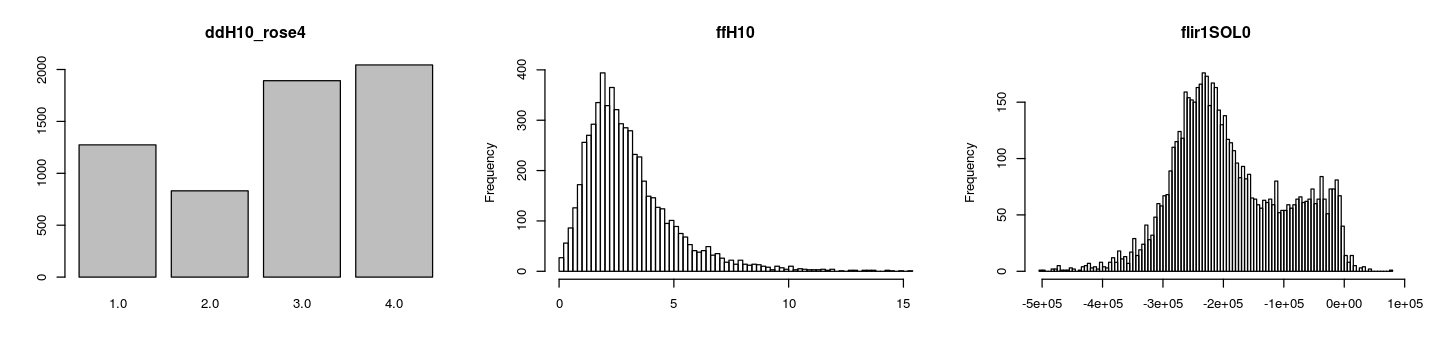

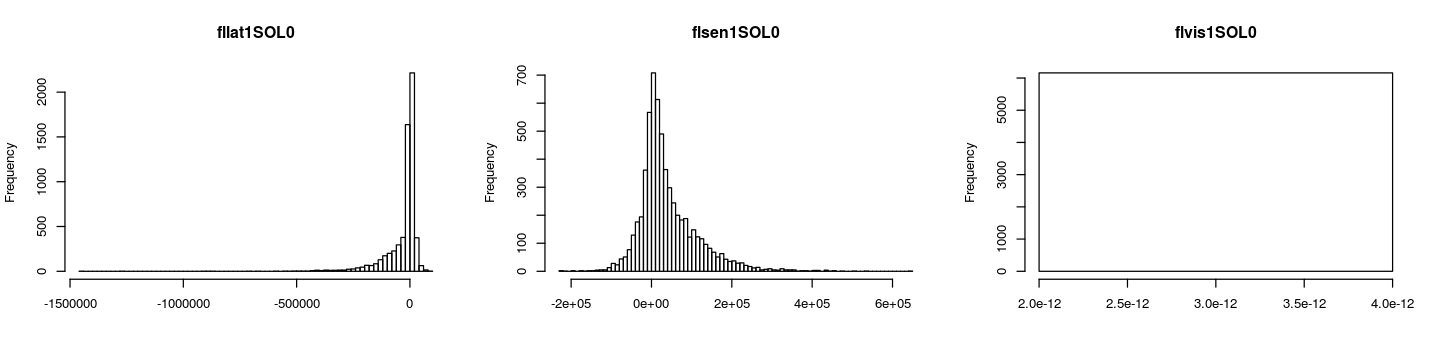

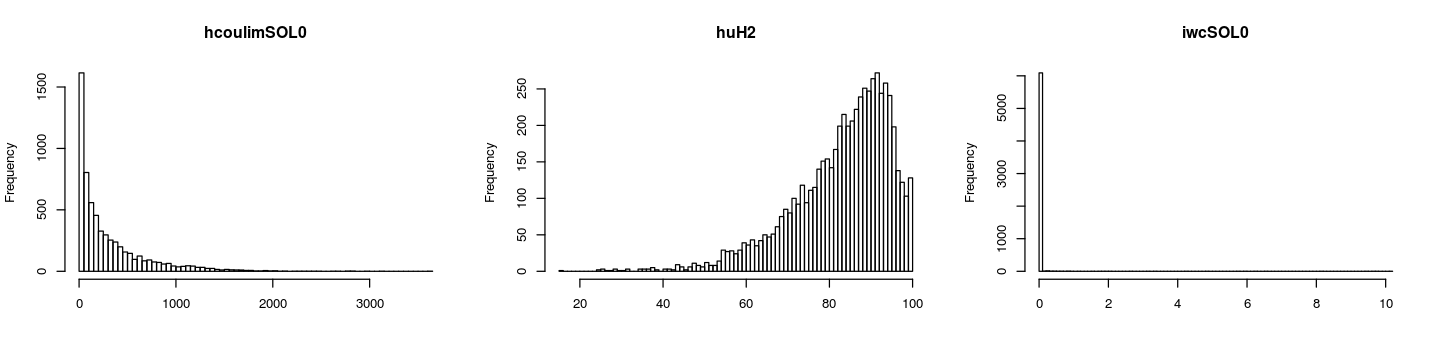

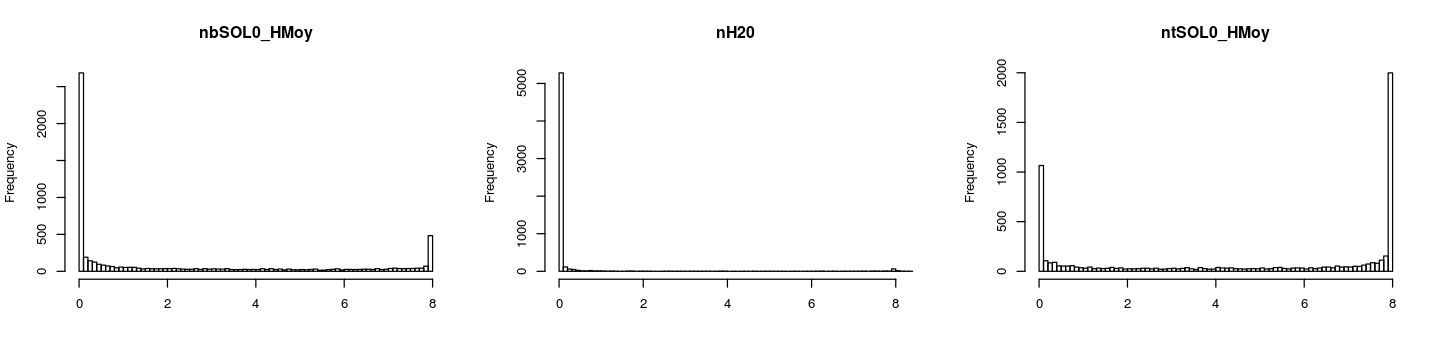

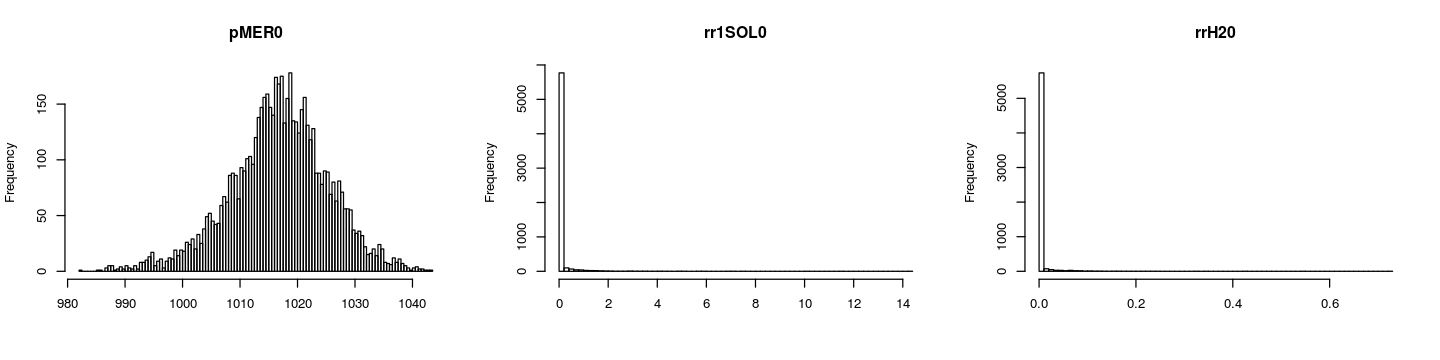

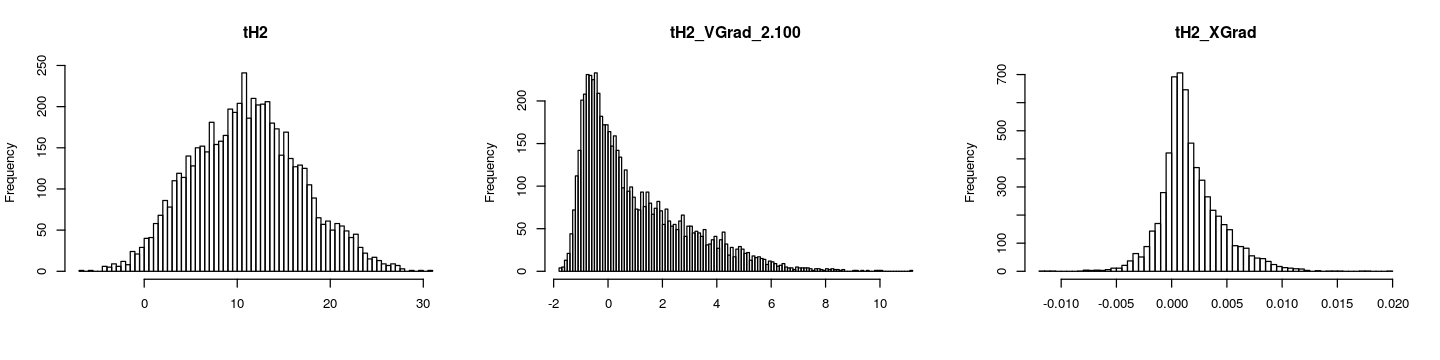

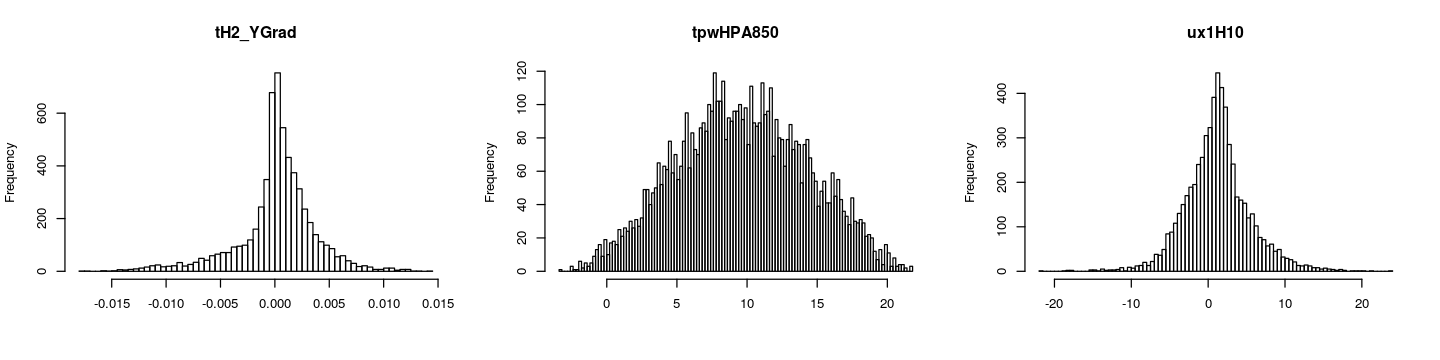

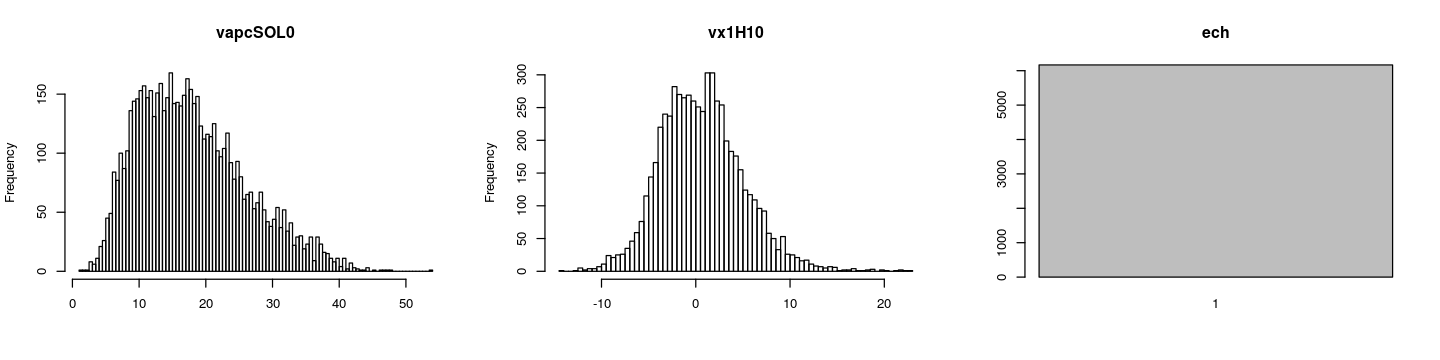

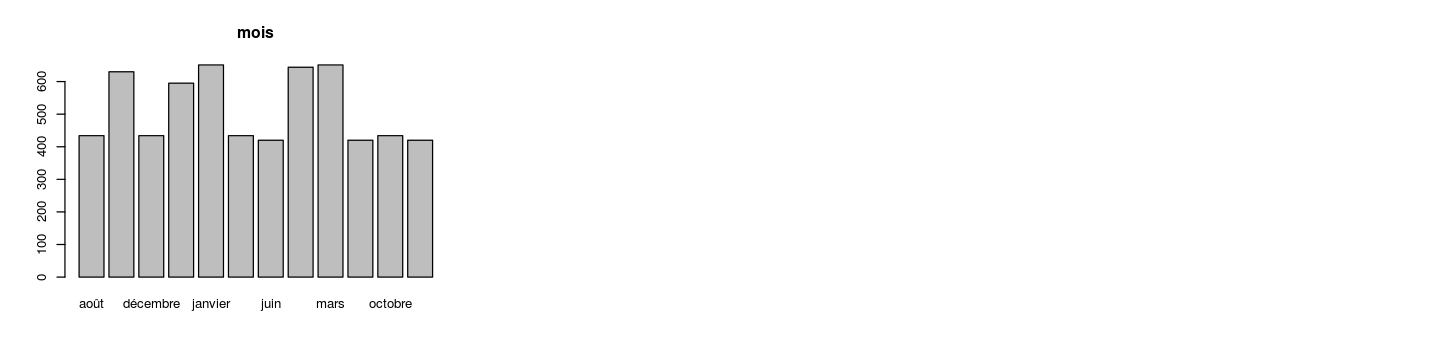

In [11]:
par(mfrow=c(1,3))
options(repr.plot.width=12, repr.plot.height=3)

for (name in colnames(meteo)) {
    if (class(meteo[,name])=='Date') {
        hist(meteo[,name],"months",main=name,xlab='')    # on traite differemment le type 'date'
    } else{
        if (class(meteo[,name])=='factor') {
            barplot(table(meteo[,name]),main=name)
        } else {
            hist(meteo[,name],main=name,breaks=100,xlab='')
        }
    }
}

** Quelles variables ajustées pour les rendre plus gaussiennes?**

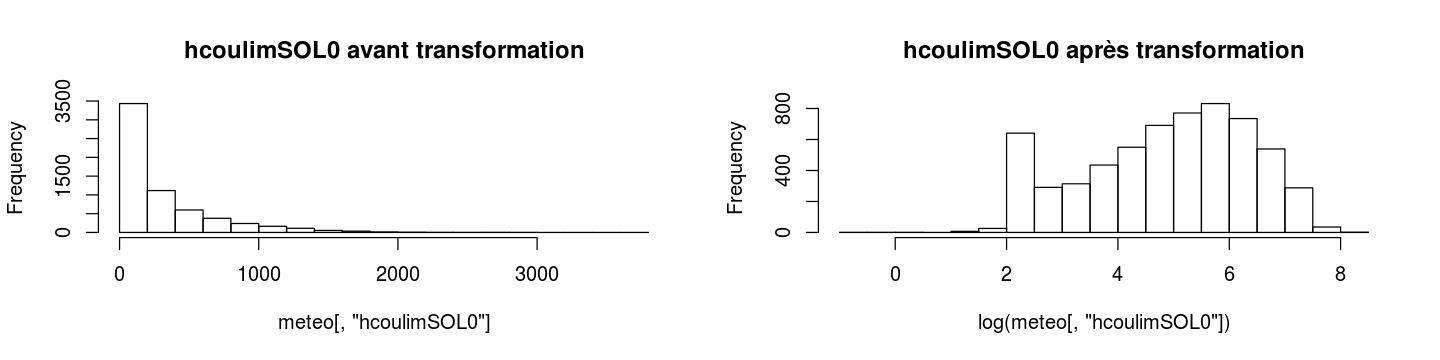

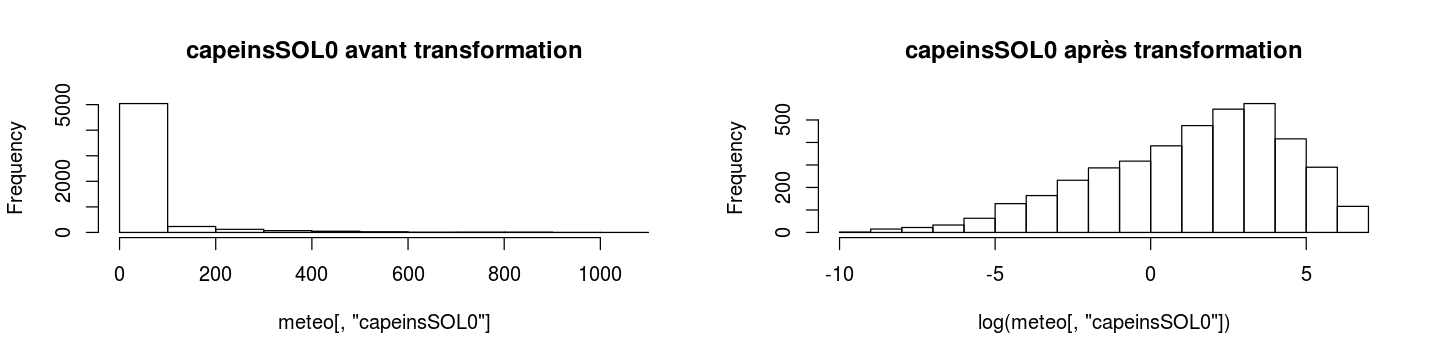

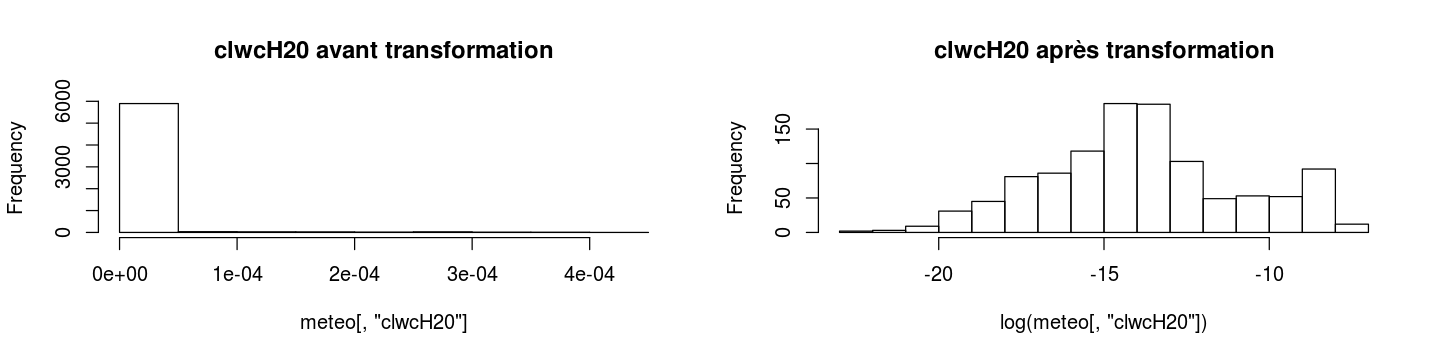

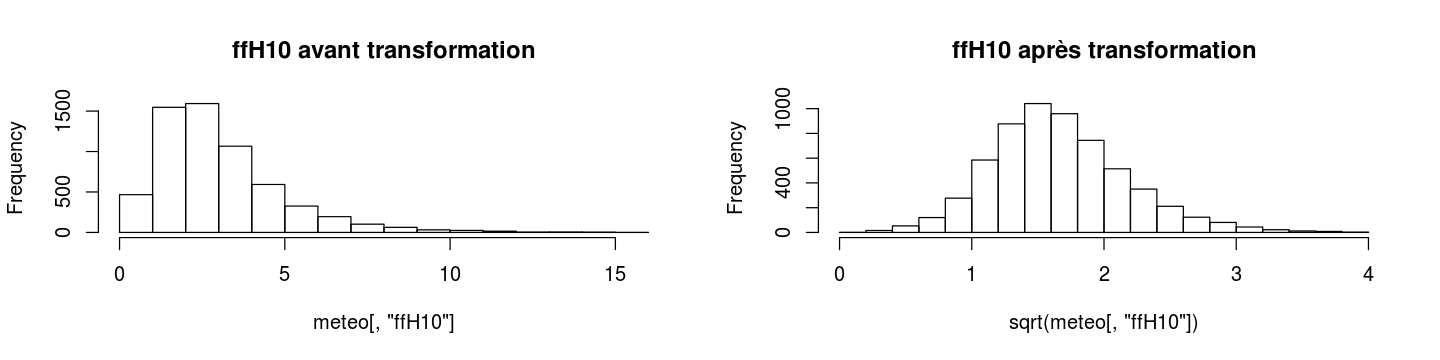

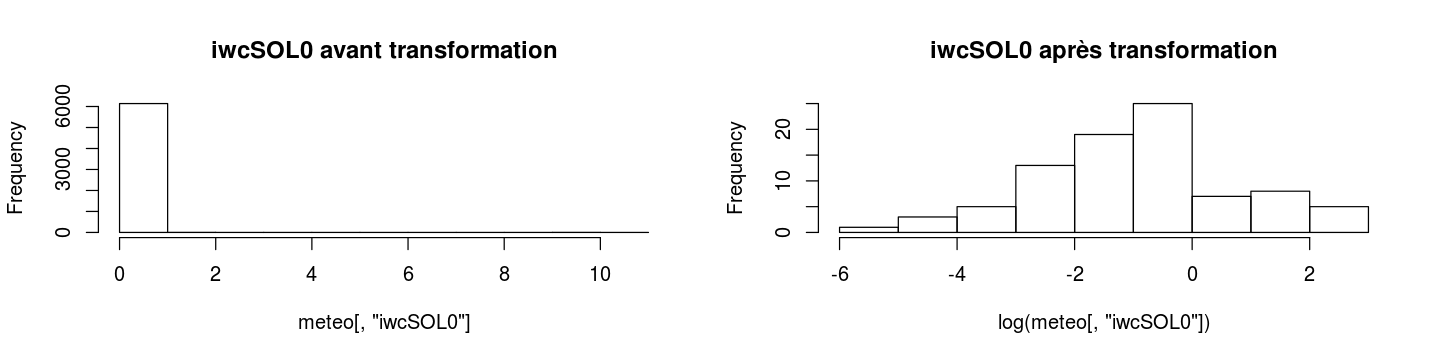

In [12]:
par(mfrow=c(1,2))
hist(meteo[,'hcoulimSOL0'],main="hcoulimSOL0 avant transformation")
hist(log(meteo[,'hcoulimSOL0']),main="hcoulimSOL0 après transformation")
hist(meteo[,'capeinsSOL0'],main="capeinsSOL0 avant transformation")
hist(log(meteo[,'capeinsSOL0']),main="capeinsSOL0 après transformation")
hist(meteo[,'clwcH20'],main="clwcH20 avant transformation")
hist(log(meteo[,'clwcH20']),main="clwcH20 après transformation")
hist(meteo[,'ffH10'],main="ffH10 avant transformation")
hist(sqrt(meteo[,'ffH10']),main="ffH10 après transformation")
hist(meteo[,'iwcSOL0'],main="iwcSOL0 avant transformation")
hist(log(meteo[,'iwcSOL0']),main="iwcSOL0 après transformation")
#hist(sqrt(meteo[,'tH2_VGrad_2.100']))

In [24]:
# if needed to rescale
#meteo=scale(meteo[,c(3:29)])

On utilise donc *corrplot* pour voir la corrélation entre les variables quantitatives :

corrplot 0.84 loaded


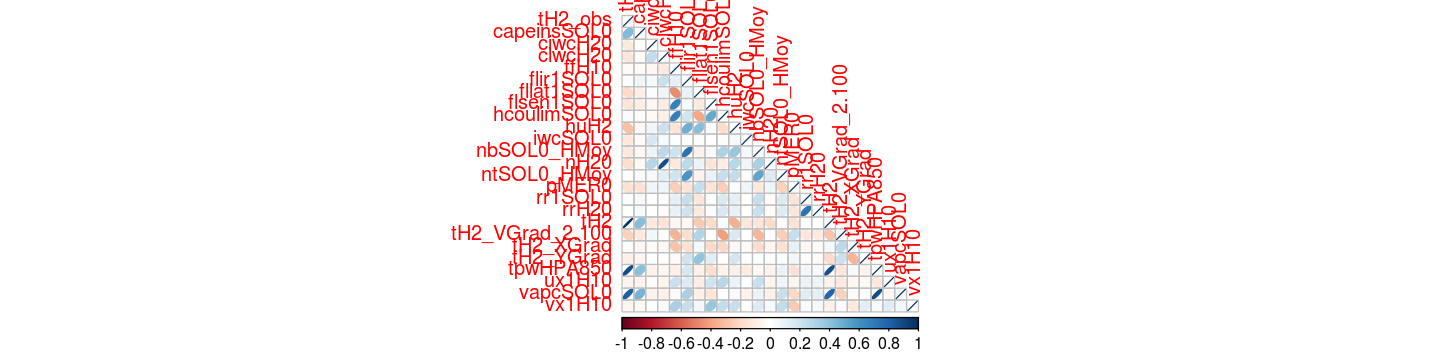

In [54]:
library(corrplot)
corrplot(cor(meteo_quanti[,-grep('flvis1SOL0',colnames(meteo_quanti))], use = "complete.obs"), method = "ellipse",type = "lower")

**Pour les variables qualitatives :**

On ne fait cela que pour les deux variables ayant un nombre de modalités raisonnable pour que le mosaïcplot soit lisible et interprétable.

Le mosaïcplot entre le mois et le lieu n'a pas d'intérêt car les effectifs des mesures sont les mêmes selon les lieux.

Nombre de modalités des variables qualitatives :

date       insee ddH10_rose4         ech        mois 
        881           7           5           1          12

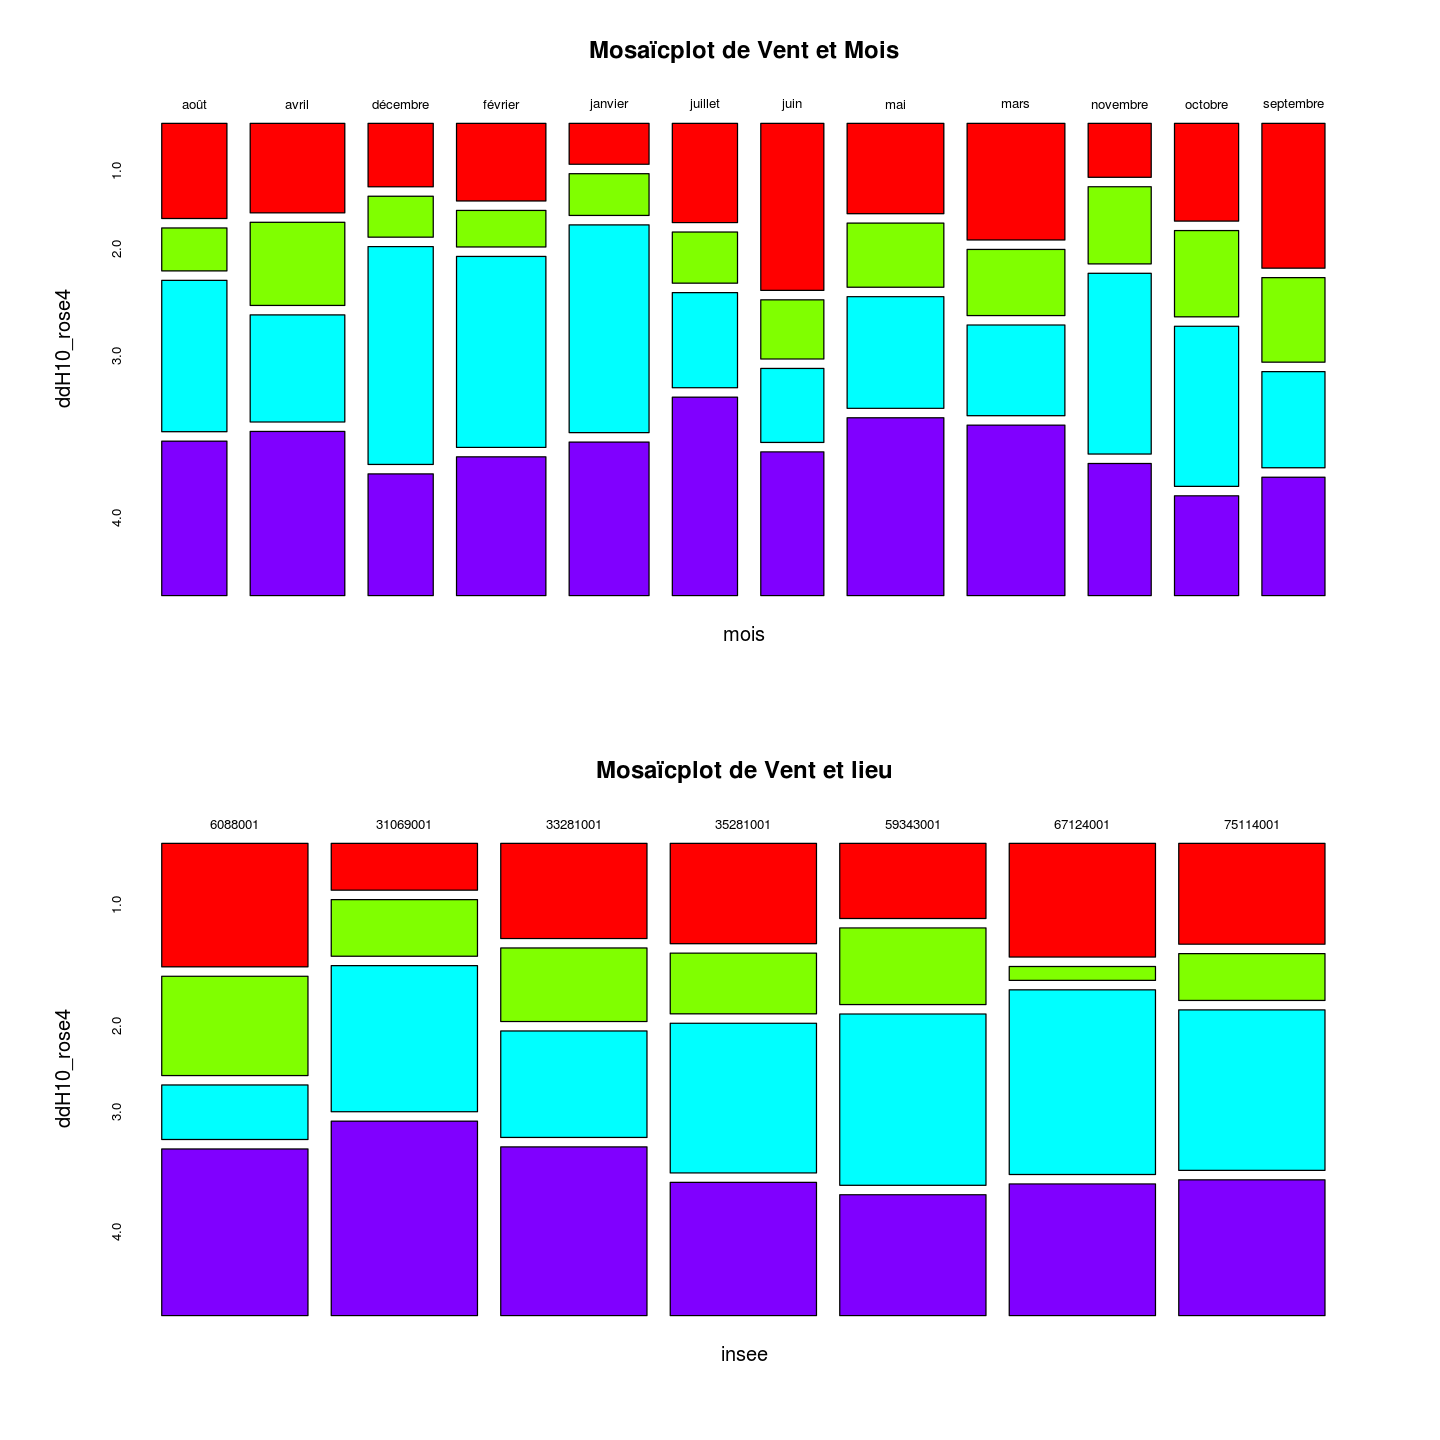

In [55]:
# représentation graphique ??
cat("Nombre de modalités des variables qualitatives :")
sapply(meteo_quali,FUN=function(x){length(unique(factor(x)))})
par(mfrow=c(2,1))
options(repr.plot.width=12, repr.plot.height=12)
mosaicplot(table(meteo_quali[,c(5,3)]),color=rainbow(4),main="Mosaïcplot de Vent et Mois")
# attention à l'ordre des mois
mosaicplot(table(meteo_quali[,c(2,3)]),color=rainbow(4),main="Mosaïcplot de Vent et lieu")

Dans la cellule en-dessous, on sélectionne que les variables quantitatives pour la fonction `pairs`:

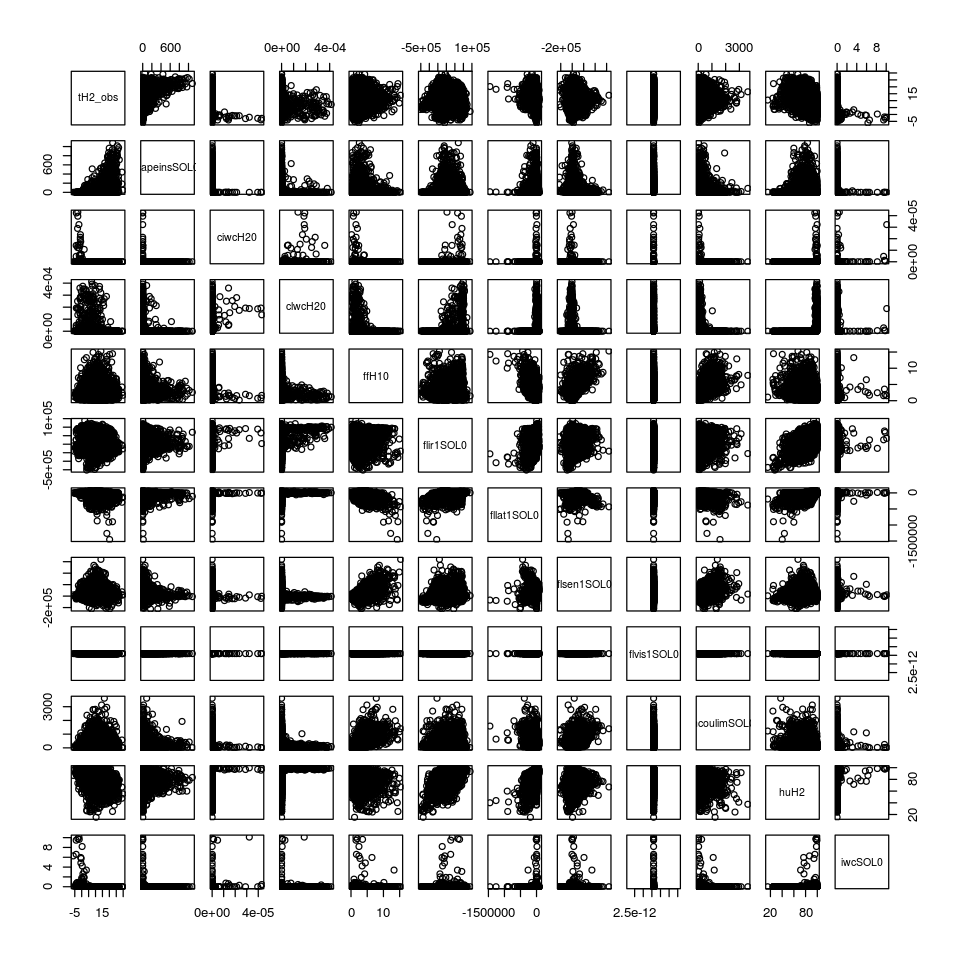

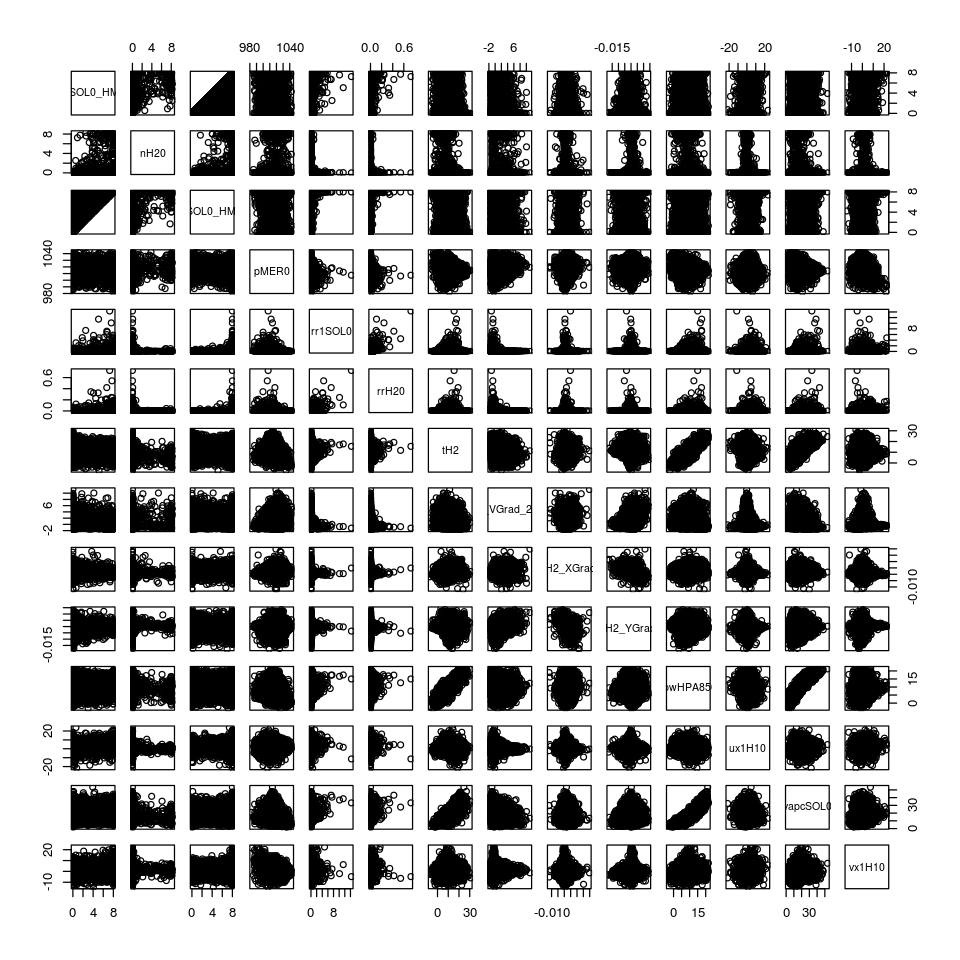

In [56]:
options(repr.plot.width=8, repr.plot.height=8)
pairs(meteo_quanti[,1:12])
pairs(meteo_quanti[,13:26])

## Données Manquantes

In [13]:
nb_na<-sapply(meteo,FUN=function(x){round(length(which(is.na(x)))/nrow(meteo),3)})
cat("Nombre de données manquantes par variable :")
nb_na

Nombre de données manquantes par variable :

date           insee         tH2_obs     capeinsSOL0         ciwcH20 
          0.000           0.000           0.000           0.094           0.001 
        clwcH20     ddH10_rose4           ffH10       flir1SOL0      fllat1SOL0 
          0.019           0.020           0.020           0.001           0.000 
     flsen1SOL0      flvis1SOL0     hcoulimSOL0            huH2         iwcSOL0 
          0.001           0.001           0.001           0.020           0.001 
    nbSOL0_HMoy            nH20     ntSOL0_HMoy           pMER0         rr1SOL0 
          0.001           0.052           0.001           0.023           0.001 
          rrH20             tH2 tH2_VGrad_2.100       tH2_XGrad       tH2_YGrad 
          0.020           0.020           0.020           0.020           0.020 
      tpwHPA850          ux1H10        vapcSOL0          vx1H10             ech 
          0.001           0.020           0.001           0.019           0.000 
           mois 
          0.000

- 581 Na's in capeinsSOL0

In [14]:
# dans un premier temps, les supprimer
meteo=meteo[complete.cases(meteo),]
cat(6167-nrow(meteo),'rows have been deleted (',(6167-nrow(meteo))/6167*100,'%)');
summary(meteo)

840 rows have been deleted ( 13.62089 %)

      date                 insee        tH2_obs       capeinsSOL0      
 Min.   :2014-01-01   6088001 :761   Min.   :-6.10   Min.   :   0.000  
 1st Qu.:2014-07-26   31069001:761   1st Qu.: 6.80   1st Qu.:   0.000  
 Median :2015-04-16   33281001:761   Median :10.50   Median :   1.055  
 Mean   :2015-04-01   35281001:761   Mean   :10.79   Mean   :  38.137  
 3rd Qu.:2015-11-22   59343001:761   3rd Qu.:14.50   3rd Qu.:  20.416  
 Max.   :2016-05-30   67124001:761   Max.   :29.80   Max.   :1083.809  
                      75114001:761                                     
    ciwcH20             clwcH20          ddH10_rose4     ffH10         
 Min.   :0.000e+00   Min.   :0.000e+00   1.0:1178    Min.   : 0.00823  
 1st Qu.:0.000e+00   1st Qu.:0.000e+00   2.0: 744    1st Qu.: 1.74788  
 Median :0.000e+00   Median :0.000e+00   3.0:1641    Median : 2.61289  
 Mean   :6.145e-08   Mean   :5.446e-06   4.0:1764    Mean   : 3.04686  
 3rd Qu.:0.000e+00   3rd Qu.:0.000e+00               3rd Qu.: 3.

## ACP

In [33]:
head(meteo_quanti)

tH2_obs,capeinsSOL0,ciwcH20,clwcH20,ffH10,flir1SOL0,fllat1SOL0,flsen1SOL0,flvis1SOL0,hcoulimSOL0,⋯,rr1SOL0,rrH20,tH2,tH2_VGrad_2.100,tH2_XGrad,tH2_YGrad,tpwHPA850,ux1H10,vapcSOL0,vx1H10
5.5,0.1987571,0,0.000000e+00,1.970260,-386960.60,-94260.683,-40545.51,3.6e-12,66.60037,⋯,0.00000000,0.000000000,9.034338,-0.08499924,0.0077247580,-1.302382e-02,3.852825,1.330320,10.664653,-2.853134
4.8,8.5900357,0,0.000000e+00,2.755962,-200181.12,2282.952,14399.92,3.6e-12,57.95461,⋯,0.00000000,0.000000000,3.853128,1.39613838,0.0050364899,8.099488e-04,8.476699,-2.040020,15.462043,3.019614
8.9,69.2038560,0,1.026762e-06,3.411283,-62310.34,9483.691,64790.37,3.6e-12,202.98558,⋯,0.08131525,0.005008075,8.585184,0.38732851,0.0013721653,9.738356e-06,7.643070,3.029610,17.343600,4.889849
6.8,65.2703162,0,0.000000e+00,4.655633,-61612.12,-48356.476,127450.66,3.6e-12,343.97419,⋯,0.02994557,0.008139327,7.304130,-0.08926672,0.0004008195,-6.683600e-05,7.089030,-1.027446,13.981847,8.079973
5.4,5.9325045,0,0.000000e+00,5.855930,-39553.11,-1022.914,117800.17,3.6e-12,656.97274,⋯,0.00000000,0.000000000,5.829715,-0.48960617,0.0002040359,-1.907392e-04,4.546075,2.802554,9.941609,7.955489
2.9,0.0000000,0,0.000000e+00,6.697897,-232184.64,-48990.060,190374.11,3.6e-12,128.07842,⋯,0.00000000,0.000000000,1.694268,3.22153532,0.0001551111,9.150665e-04,7.415663,2.217511,11.333324,9.243589


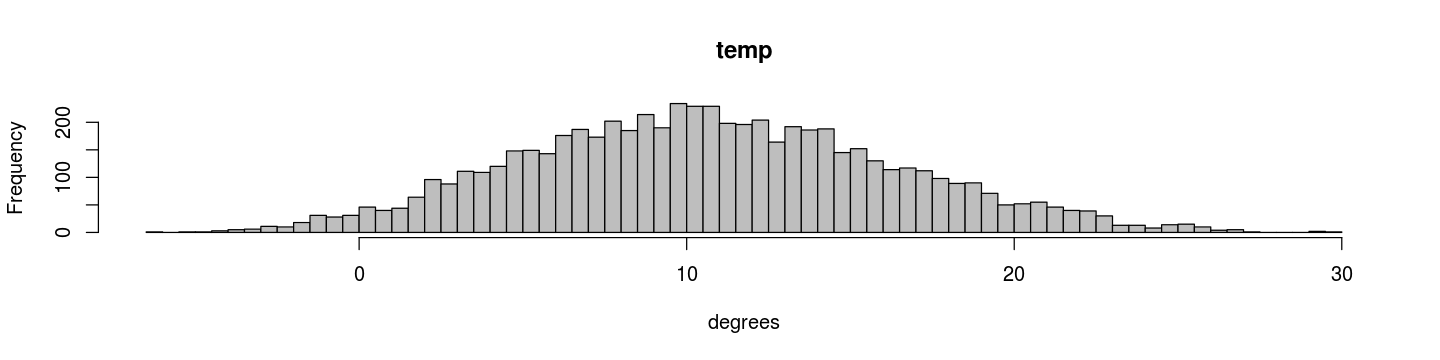

In [34]:
df_wo_label = meteo_quanti[,-1]
y = data.frame(temp=meteo_quanti[,1])
hist(y[,1],main=colnames(y),xlab='degrees',breaks=100,col='grey')

Creation d'une variable binaire pour la température ($<10$ et $>10$, cf hist)

In [35]:
y[,"temp_classe"]=as.factor(y[,"temp"]<10)
summary(y$temp_classe)

FALSE  TRUE 
 3350  2817

In [37]:
#install.packages("FactoMineR")
library("FactoMineR")
df_acp = data.frame(label=y[,"temp_classe"], df_wo_label)

pca=PCA(df_acp,scale.unit=T,graph=F, quali.sup=1)
options(repr.plot.width=7, repr.plot.height=7)

Warning message in PCA(df_acp, scale.unit = T, graph = F, quali.sup = 1):
“Missing values are imputed by the mean of the variable: you should use the imputePCA function of the missMDA package”

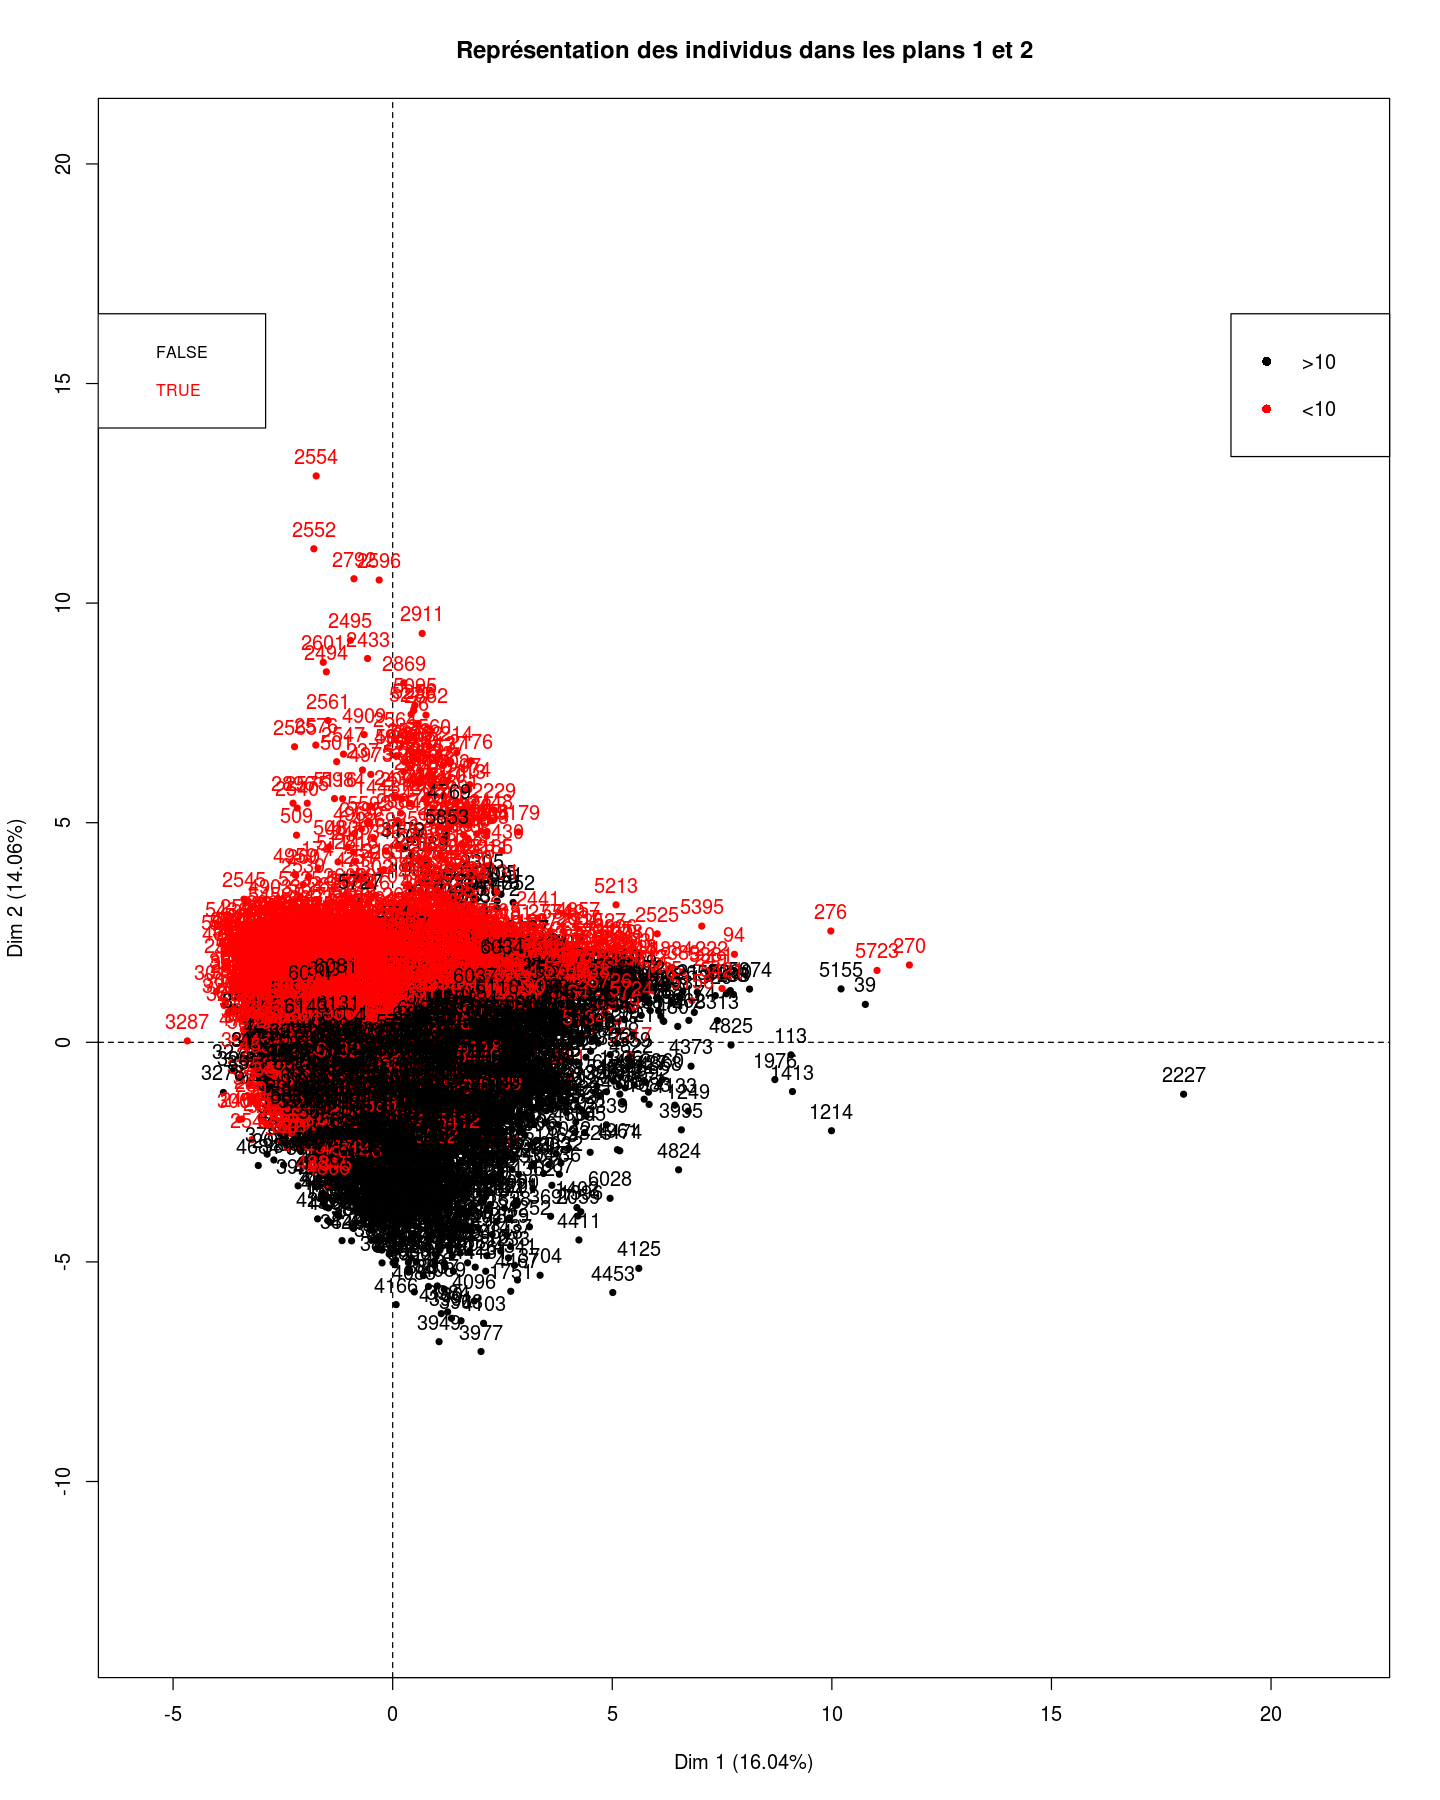

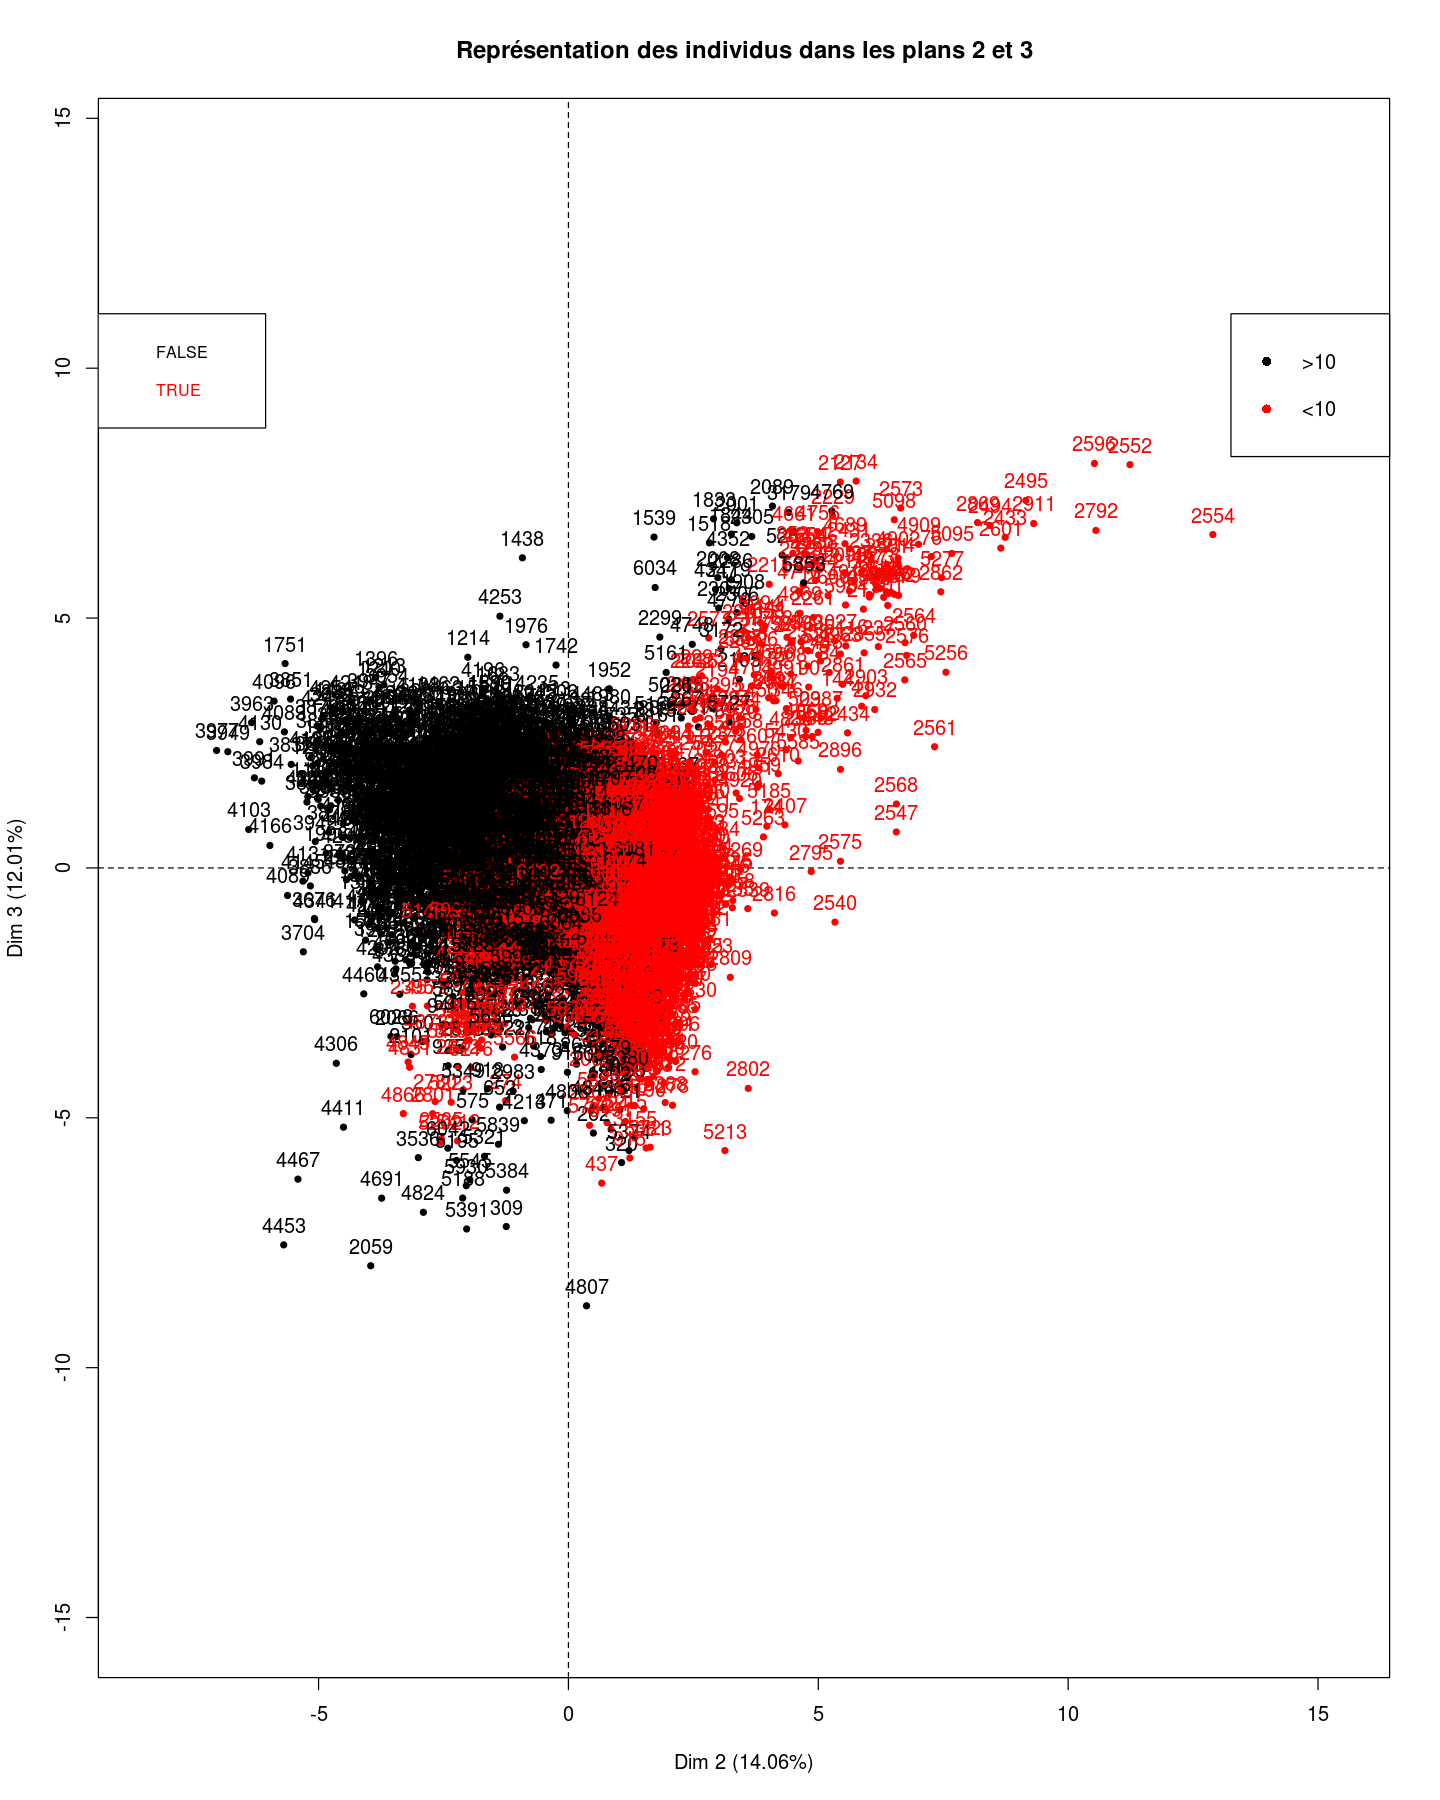

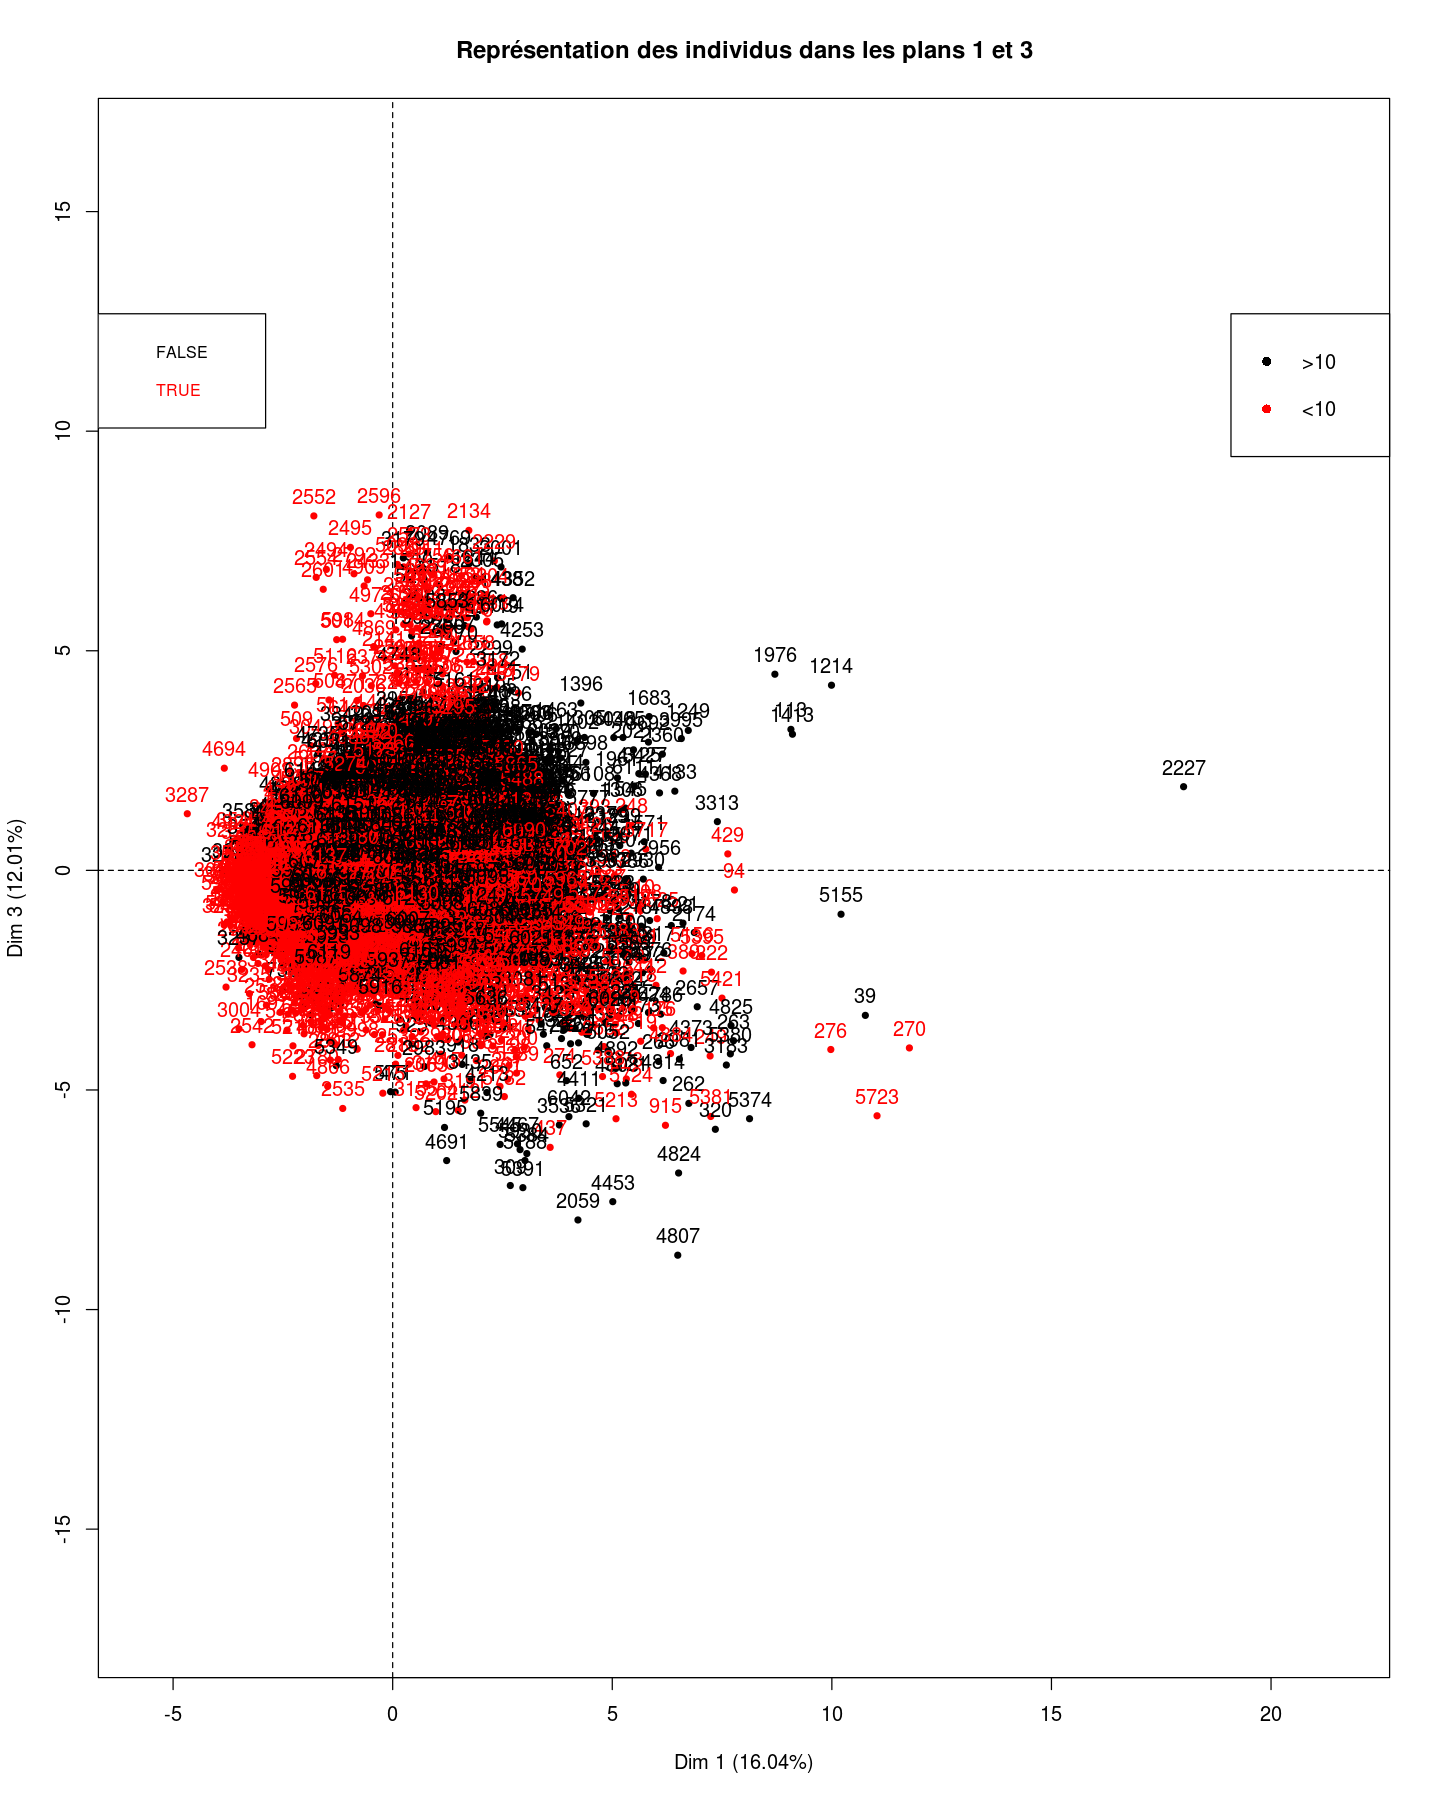

In [46]:
par(mfrow=c(1,1))
options(repr.plot.width=12, repr.plot.height=15)
plot(pca, axes=1:2, choix="ind", habillage=1, title="Représentation des individus dans les plans 1 et 2")
legend("topright", legend=c(">10", "<10"),
       col=c("black", "red"), pch=16)
plot(pca, axes=2:3, choix="ind", habillage=1, title="Représentation des individus dans les plans 2 et 3")
legend("topright", legend=c(">10", "<10"),
       col=c("black", "red"), pch=16)
plot(pca, axes=c(1,3), choix="ind", habillage=1, title="Représentation des individus dans les plans 1 et 3")
legend("topright", legend=c(">10", "<10"),
       col=c("black", "red"), pch=16)

# la legende ne s'affiche pas, je sais pas pourquoi

Sur les graphes précédents, on peut voir que la ségrégation des individus selon la température est très visible selon l'axe 2. On va voir sur le graphe suivant quelles sont les variables qui pportent cet axe.

Warning message in arrows(0, 0, coord.var[v, 1], coord.var[v, 2], length = 0.1, :
“zero-length arrow is of indeterminate angle and so skipped”

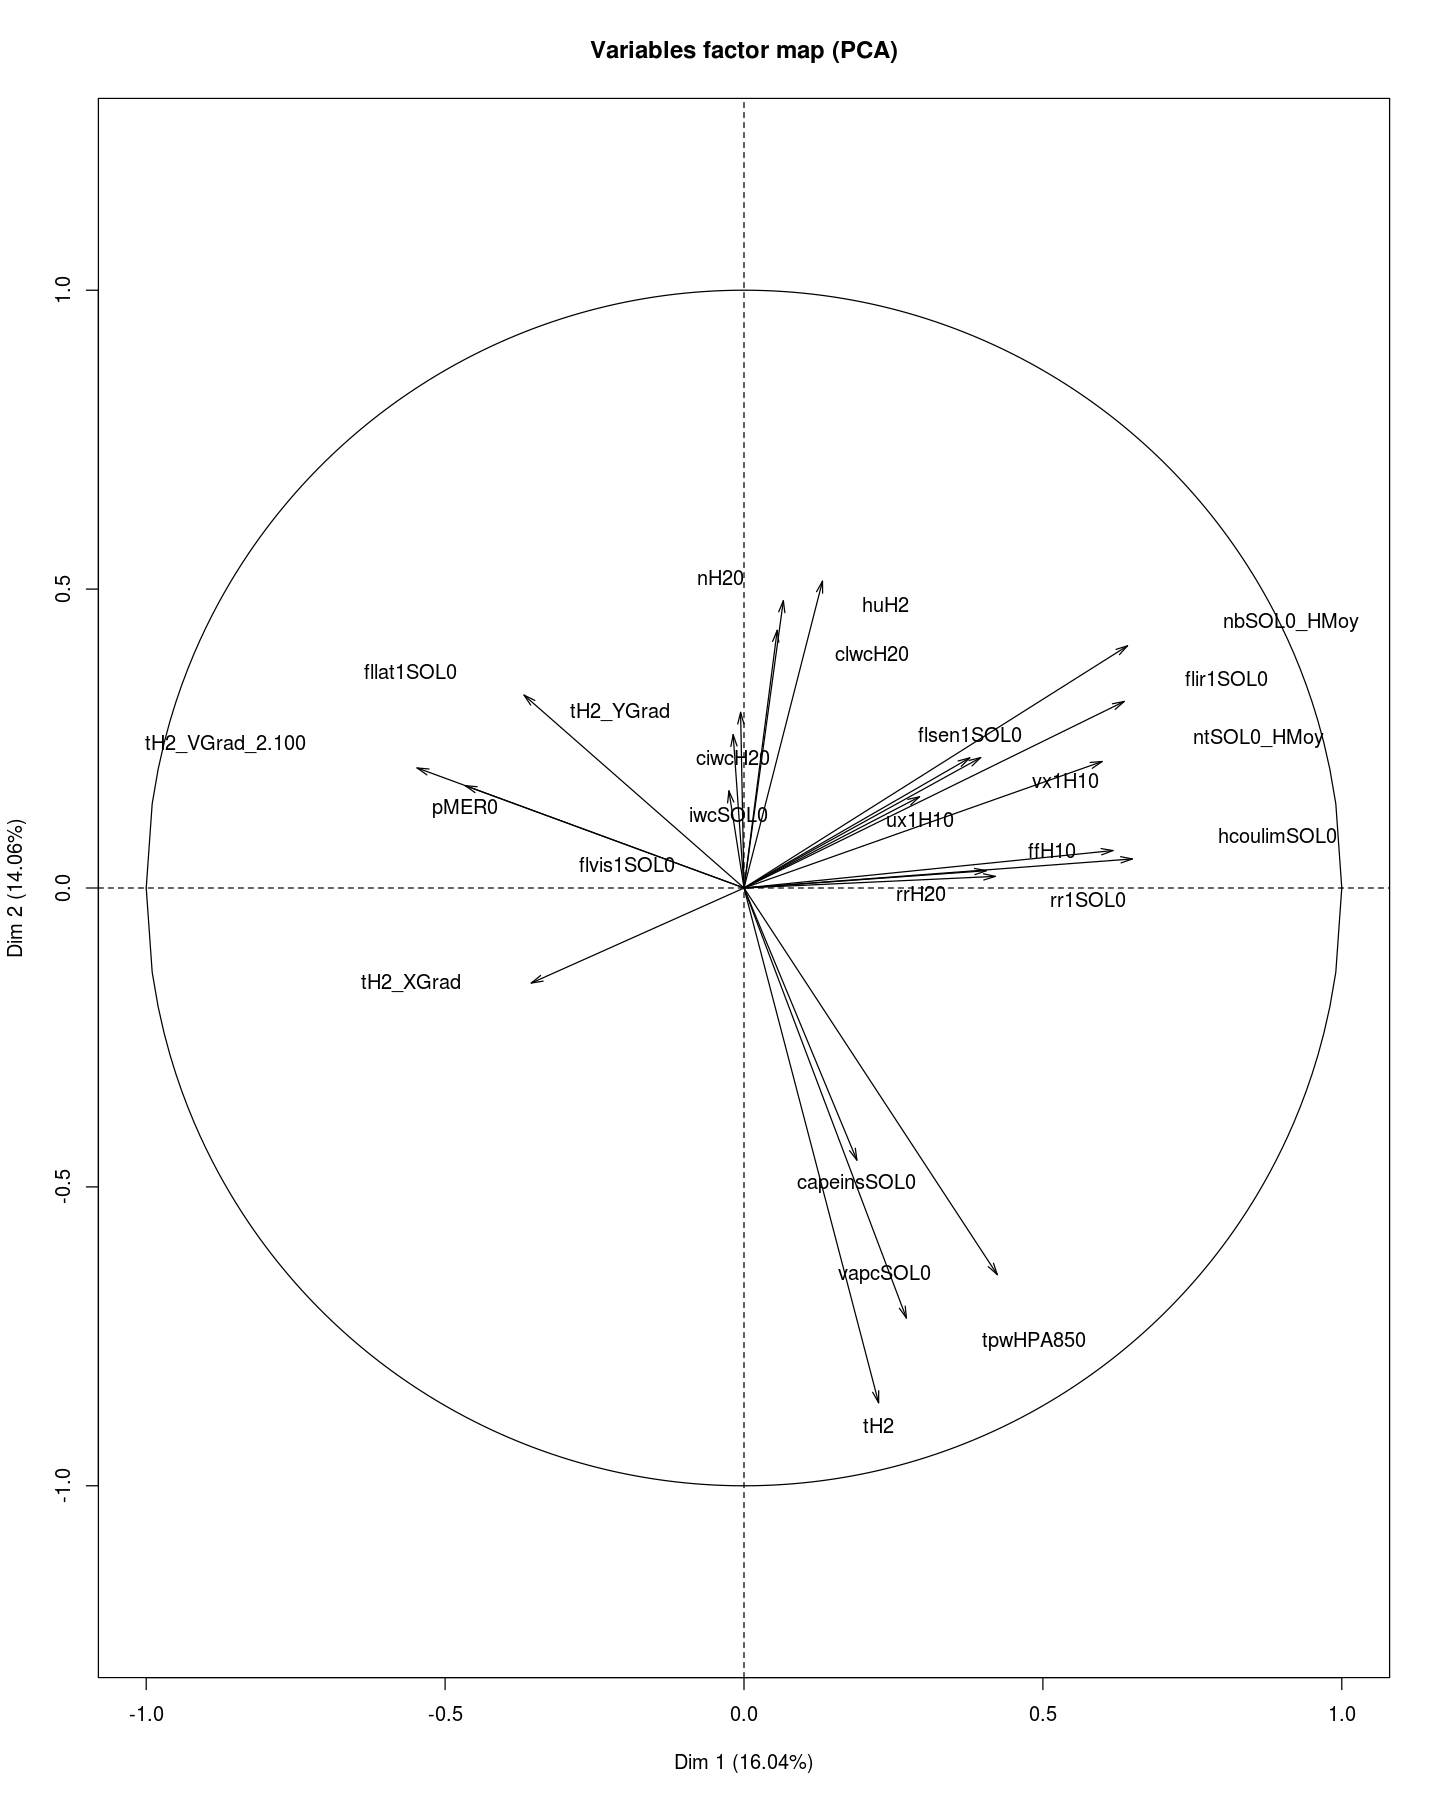

In [47]:
plot(pca, choix="var")

In [48]:
dimdesc(pca, axes=c(1,2))

,correlation,p.value
hcoulimSOL0,0.64978739,0.000000e+00
nbSOL0_HMoy,0.64156681,0.000000e+00
flir1SOL0,0.63604677,0.000000e+00
ffH10,0.61724418,0.000000e+00
ntSOL0_HMoy,0.59911538,0.000000e+00
vapcSOL0,0.42370798,3.022638e-267
rr1SOL0,0.42030957,1.431433e-262
rrH20,0.40526949,1.621606e-242
vx1H10,0.39589346,1.579824e-230
flsen1SOL0,0.37765561,2.694096e-208


In [49]:
summary(pca)


Call:
PCA(X = df_acp, scale.unit = T, quali.sup = 1, graph = F) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               3.849   3.375   2.883   1.829   1.654   1.206   1.156
% of var.             16.037  14.061  12.013   7.622   6.893   5.026   4.818
Cumulative % of var.  16.037  30.098  42.111  49.733  56.626  61.652  66.470
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               1.053   0.940   0.818   0.765   0.722   0.637   0.562
% of var.              4.387   3.918   3.409   3.186   3.007   2.654   2.341
Cumulative % of var.  70.857  74.775  78.185  81.371  84.378  87.032  89.372
                      Dim.15  Dim.16  Dim.17  Dim.18  Dim.19  Dim.20  Dim.21
Variance               0.525   0.446   0.336   0.297   0.283   0.199   0.193
% of var.              2.186   1.860   1.400   1.237   1.177   0.828   0.805
Cumulative % of var.  91.558  93.419  94.819  96.056  97.234  98.061  98.

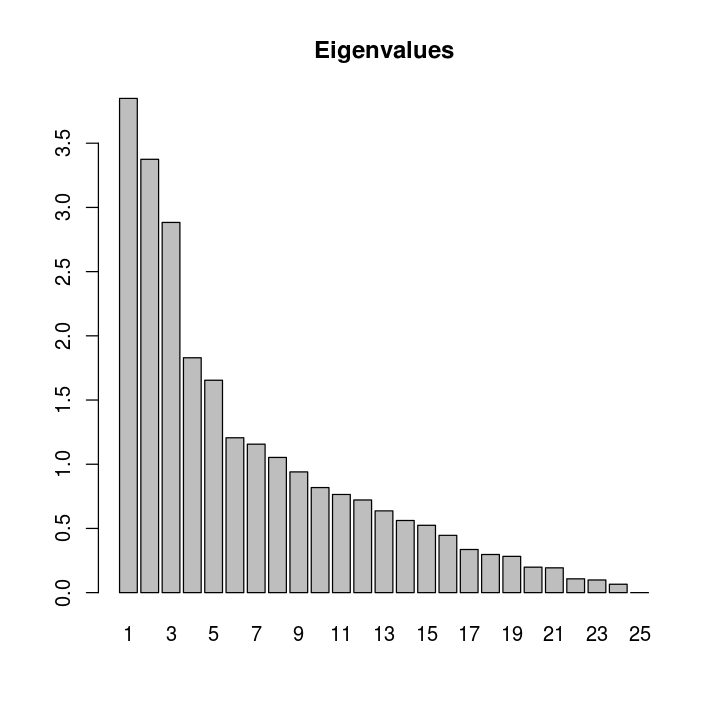

In [50]:
options(repr.plot.width=6, repr.plot.height=6)
barplot(pca$eig[,1],main="Eigenvalues",names.arg=1:nrow(pca$eig))

## AFCM

In [55]:
df_afc=data.frame(meteo_quali[,-c(1,4)],label=meteo_quanti[,1])
head(df_afc)
table(df_afc[,"ddH10_rose4"], exclude=FALSE)

insee,ddH10_rose4,mois,label
6088001,4.0,janvier,5.5
31069001,3.0,janvier,4.8
33281001,3.0,janvier,8.9
35281001,3.0,janvier,6.8
59343001,3.0,janvier,5.4
67124001,3.0,janvier,2.9



 1.0  2.0  3.0  4.0 <NA> 
1274  831 1892 2044  126 

In [60]:
afc=MCA(df_afc,quanti.sup=4,graph=T,na.method="Average")

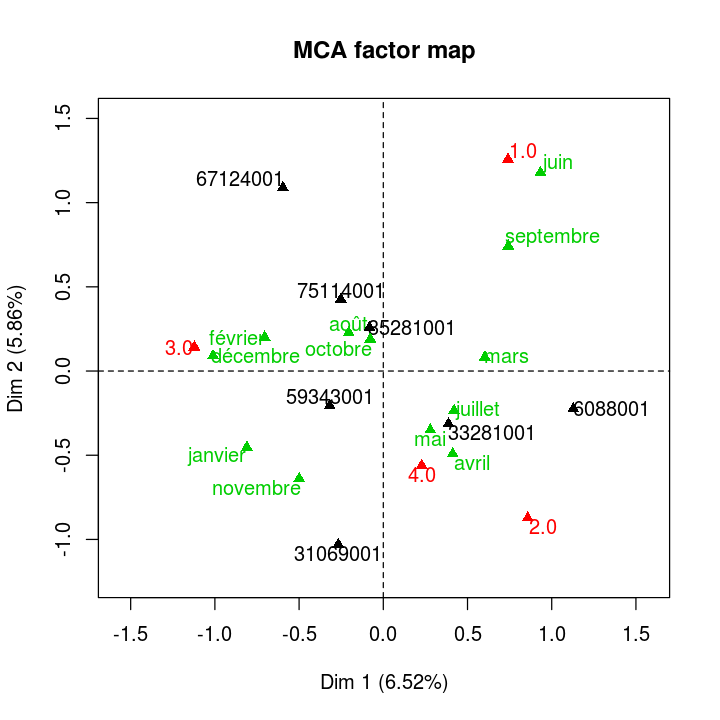

In [61]:
options(repr.plot.width=6, repr.plot.height=6)
plot.MCA(afc,invisible=c("ind"),habillage="quali")

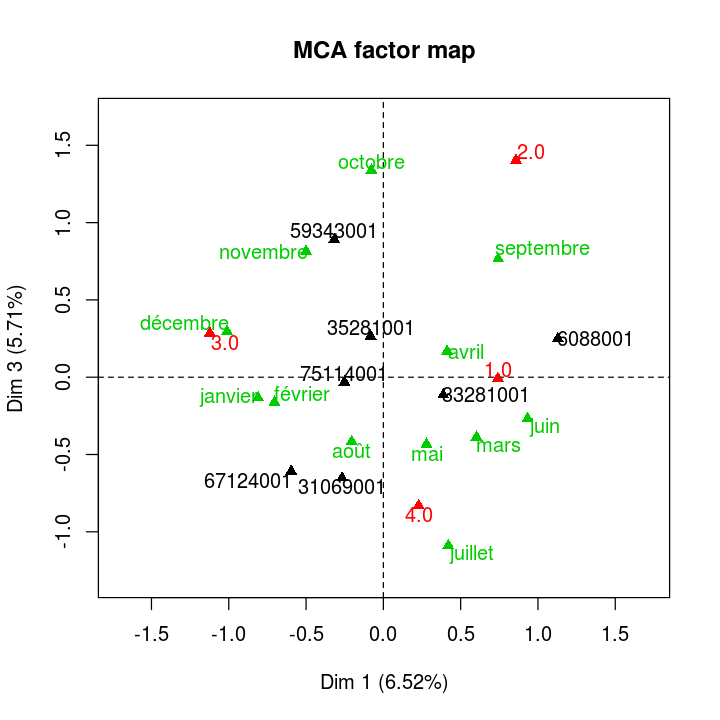

In [64]:
plot.MCA(afc,axes=c(1,3),invisible=c("ind"),habillage="quali")

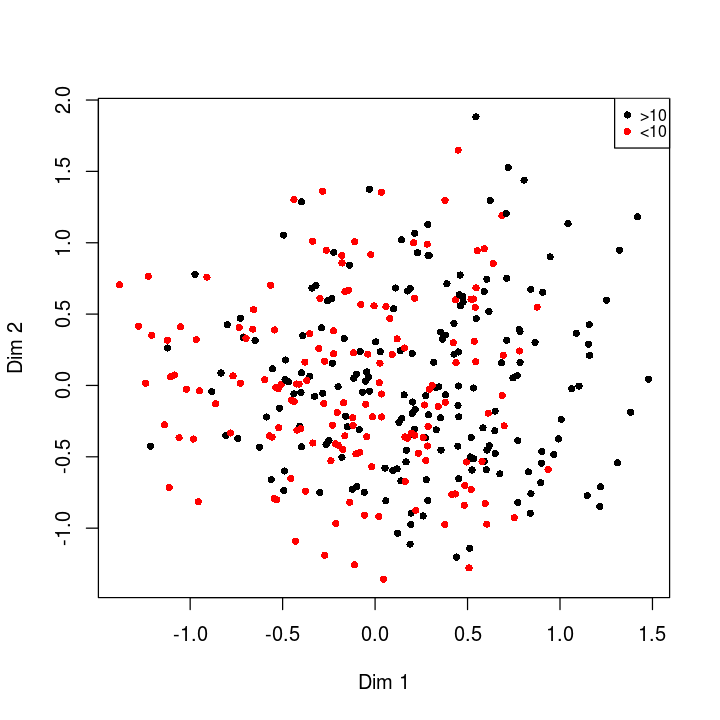

In [70]:
options(repr.plot.width=6, repr.plot.height=6)
palette("default")
plot(afc$ind$coord,type="p",pch=16,cex=0.8,col=as.integer(y[,"temp_classe"]))
legend("topright", legend=c(">10", "<10"),col=c("black", "red"), pch=16,cex=0.8)

### K-Means

In [ ]:
km.meteo=kmeans(scale(meteo[,c(3:29)]),centers=3)
# Représentatino dans les coordonnées de l'acp
coul=km.meteo$cluster
plot(acp$scores,col=coul, pch=18)

WOW :O

In [ ]:
set.seed(111) # initialisation du générateur
# Extraction des échantillons
test.ratio=.2   # part de l'échantillon test
npop=nrow(meteo) # nombre de lignes dans les données
nvar=ncol(meteo) # nombre de colonnes
# taille de l'échantillon test
ntest=ceiling(npop*test.ratio) 
# indices de l'échantillon test
testi=sample(1:npop,ntest)
# indices de l'échantillon d'apprentissage
appri=setdiff(1:npop,testi) 

In [ ]:
# construction de l'échantillon d'apprentissage
datappr=meteo[appri,-2] 
# construction de l'échantillon test
datestr=meteo[testi,-2] 
summary(datappr) # vérification

In [ ]:
# estimation du modèle sans interaction
reg.lm=aov(tH2_obs~.,data=datappr)
# Extraction des résidus et des valeurs ajustées
# de ce modèle
res.lm=reg.lm$residuals
fit.lm=reg.lm$fitted.values
# graphe des résidus
# Définition d'une fonction pour un graphe coloré et 
# des échelles fixes sur les axes
plot.res=function(x,y,titre="titre")
{
plot(x,y,col="blue",xlim=c(0,250),ylim=c(-100,100),
ylab="Résidus",xlab="Valeurs predites",main=titre,pch=20)
# points(x2,y,col="red")
abline(h=0,col="green")
}
plot.res(fit.lm,res.lm,"")

In [ ]:
summary(reg.lm)

### Modèle quadratique

In [ ]:
# Estimation du modèle de toute interaction d'ordre 2
reg.glm=glm(tH2_obs~(.)^2,data=datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante

reg.glm.step=step(reg.glm,direction="both")

In [ ]:
# Coefficients du modèle
anova(reg.glm.step,test="F")

In [ ]:
# Extraction des valeurs ajustées et des résidus
fit.glm=reg.glm.step$fitted.values
res.glm=reg.glm.step$residuals
# Graphe des résidus
plot.res(fit.glm,res.glm,"")

### Prévision de l'échantillon test

In [ ]:
# Calcul des prévisions
pred.glm=predict(reg.glm.step,newdata=datestr)
# Erreur quadratique moyenne de prévision (MSE)
sum((pred.glm-datestr[,"O3obs"])^2)/nrow(datestr)

## 5. [Prévision par modèle binomial](http://wikistat.fr/pdf/st-m-app-rlogit.pdf)


### 5.1 Régression logistique sans interaction

In [ ]:
# estimation du modèle complet
log.lm=glm(DepSeuil~.,data=datappq,family=binomial)
# significativité des paramètres
anova(log.lm,test="Chisq")